In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import mplfinance as mpf

AAPL = yf.download("AAPL", start="2022-01-01", end="2023-08-01", interval='1d')


[*********************100%%**********************]  1 of 1 completed


In [5]:
from sklearn.linear_model import LinearRegression

def ln(df):
    lr = LinearRegression()

    X = np.arange(len(df)).reshape(-1, 1)
    y = df['Close'].values.reshape(-1, 1)

    lr.fit(X, y)
    y_pred = lr.predict(X)

    return pd.Series(y_pred.flatten(), index=df.index)

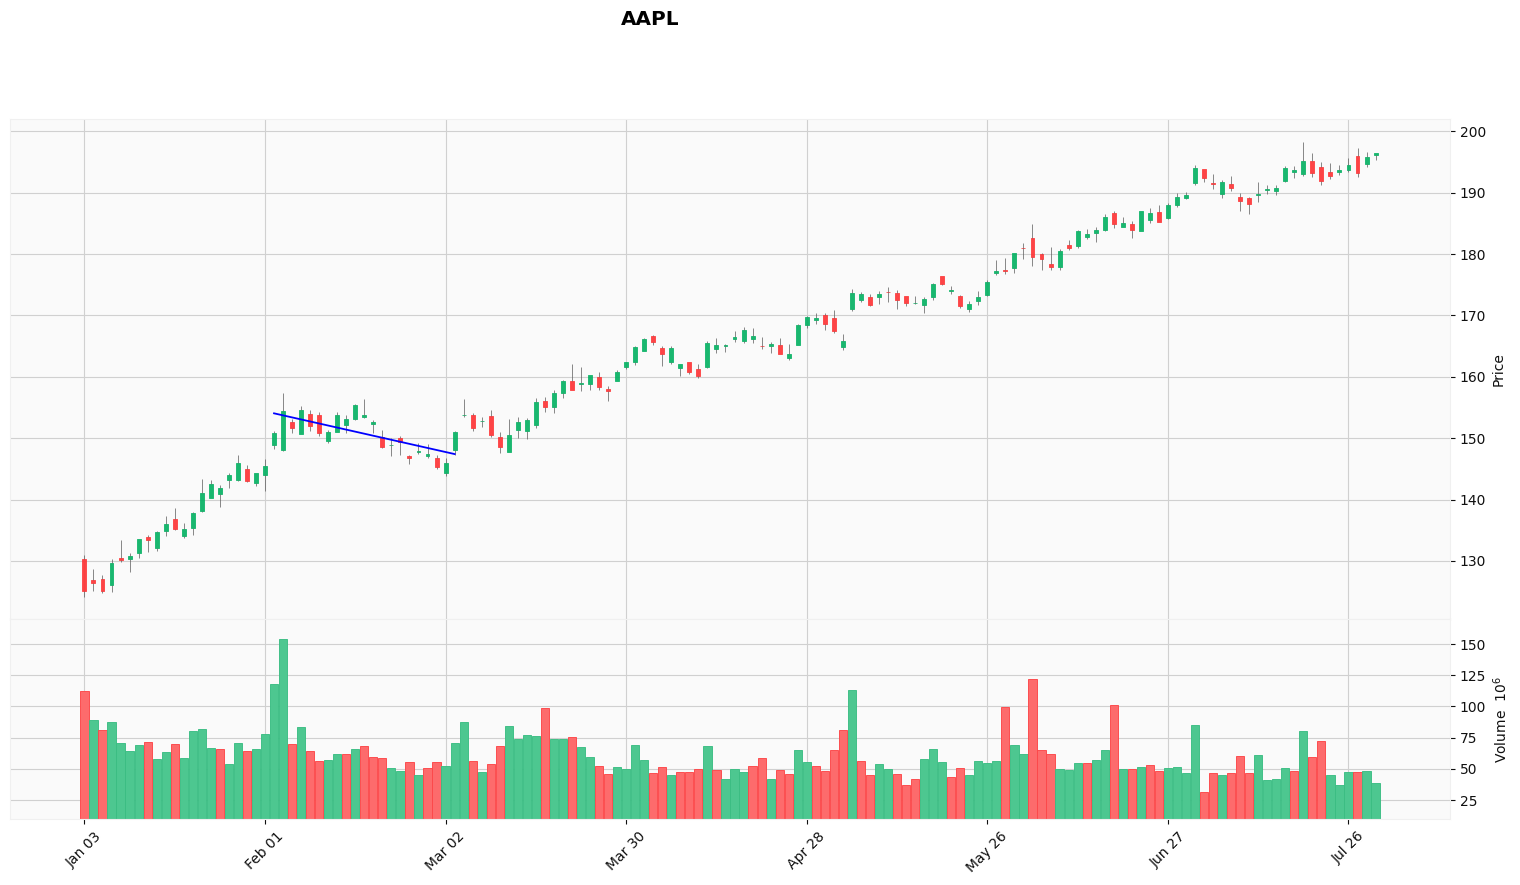

In [12]:
df = AAPL.query('Date > "2023-01-01"').copy()
df["LN"] = ln(AAPL.query('Date > "2023-02-01" & Date < "2023-03-05"'))

adsp = [
    mpf.make_addplot(df['LN'], color='b'),
]

mpf.plot(df, type='candle', style='yahoo', volume=True, figsize=(20,10), title="AAPL", addplot=adsp)